In [70]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans

api = wandb.Api()


In [71]:
projects = api.projects(entity="haraghi")

In [72]:
for project in projects:
    print(project.name)

time_series_lstm_classification
FINAL-NASL-HP-sweep-reduced
FINAL-NCALTECH101-HP-sweep-reduced
FINAL-DVSGESTURE_TONIC-HP-sweep-reduced
FINAL-FAN1vs3-HP-sweep-reduced
FINAL-DVSGESTURE_TONIC-HP-varyinig-sparsity
FINAL-NCARS-varyinig-sparsity
FINAL-NASL-varyinig-sparsity
FINAL-NCALTECH101-varyinig-sparsity
FINAL-FAN1vs3-varyinig-sparsity
lightning_logs
FINAL-FAN1vs3-HP-sweep
EST-DVSGESTURE-HP-sweep-InMemory
EST-NASL-HP-sweep
EST-DVSGESTURE-HP-sweep
sweep_EST_NCALTECH101_HP_sweep
sweep_EST_FAN1VS3_25000_initialization_effect_multi20
sweep_EST_FAN1VS3_1024_initialization_effect_multi20
sweep_EST_NCALTECH101_25000_initialization_effect_multi20
sweep_EST_NCALTECH101_256_initialization_effect_multi20
sweep_EST_NCALTECH101_1024_multi20
sweep_EST_NCALTECH101_25000_multi20
sweep_EST_NCALTECH101_256_multi20
sweep_DGCNN_FAN1VS3_multi20
sweep EST (FAN1VS3) 25000 (multi val test num 20)
sweep EST (FAN1VS3) (multi val test num 20)
sweep EST (FAN1VS3)
DGCNN_CV_format
DGCNN
aegnn-ncaltech101-recognition

In [73]:
save_folder = os.path.join('images','clustering_metric')
save_folder_paper = os.path.join('images','paper','clustering_metric')

# runs = list(api.runs("haraghi/EST-DVSGESTURE-HP-sweep"))
# save_folder = os.path.join(save_folder,'DVS_GESTURE')
# save_folder_paper = os.path.join(save_folder_paper,'DVS_GESTURE')

# runs = list(api.runs("sweep EST (FAN1VS3) (multi val test num 20)"))
# runs += list(api.runs("sweep EST (FAN1VS3) 25000 (multi val test num 20)"))

# runs = list(api.runs("sweep_EST_NCALTECH101_256_multi20"))
# runs += list(api.runs("sweep_EST_NCALTECH101_1024_multi20"))
# runs += list(api.runs("sweep_EST_NCALTECH101_25000_multi20"))
# save_folder = os.path.join(save_folder,'NCALTECH101')
# save_folder_paper = os.path.join(save_folder_paper,'NCALTECH101')

# runs =api.runs("haraghi/EST-NASL-HP-sweep")
# save_folder = os.path.join(save_folder,'NASL')
# save_folder_paper = os.path.join(save_folder_paper,'NASL')

## FINAL EXPERIMENTS:

runs = api.runs("haraghi/FINAL-FAN1VS3-HP-sweep-reduced")
save_folder = os.path.join(save_folder,'FAN1VS3')
save_folder_paper = os.path.join(save_folder_paper,'FAN1VS3')

# runs = list(api.runs("FINAL-DVSGESTURE_TONIC-HP-sweep-reduced"))
# save_folder = os.path.join(save_folder,'DVS_GESTURE_TONIC')
# save_folder_paper = os.path.join(save_folder_paper,'DVS_GESTURE_TONIC')

# runs = list(api.runs("FINAL-NCALTECH101-HP-sweep-reduced"))
# save_folder = os.path.join(save_folder,'NCALTECH101')
# save_folder_paper = os.path.join(save_folder_paper,'NCALTECH101')

# runs =api.runs("haraghi/FINAL-NASL-HP-sweep-reduced")
# save_folder = os.path.join(save_folder,'NASL')
# save_folder_paper = os.path.join(save_folder_paper,'NASL')

print(len(runs))

300


In [74]:
runs = [r for r in runs if r.state == "finished"]
print(len(runs))    

300


In [75]:
num_events = np.unique([run.config['transform']['train']['num_events_per_sample'] for run in runs])
runs_per_num_events = {num_event: [run for run in runs if run.config['transform']['train']['num_events_per_sample'] == num_event] for num_event in num_events}

In [76]:
# runs_per_num_events[256] = [runs_per_num_events[256][idx] for idx in  np.random.choice(len(runs_per_num_events[256]), 200, replace=False)]

In [77]:
def find_val_and_test_acc_keys(run):
    val_acc_key = []
    test_acc_key = []
    for key in run.summary.keys():
        if "val" in key and "acc" in key and "mean" in key:
            val_acc_key.append(key)
        if "test" in key and "acc" in key and "mean" in key:
            test_acc_key.append(key)
    assert len(val_acc_key) <= 1, f"More than one val acc key found: {val_acc_key}"
    assert len(test_acc_key) <= 1, f"More than one test acc key found: {test_acc_key}"
    return val_acc_key[0] if len(val_acc_key) == 1 else None , test_acc_key[0] if len(test_acc_key) == 1 else None

In [78]:
val_mean = {}
test_mean = {}
for num_event in num_events:
    val_mean[num_event] = []
    test_mean[num_event] = []
    for run in runs_per_num_events[num_event]:
        val_key, test_key = find_val_and_test_acc_keys(run)
        val_mean[num_event].append(run.summary[val_key] if val_key is not None and val_key in run.summary else None)
        test_mean[num_event].append(run.summary[test_key] if test_key is not None and test_key in run.summary else None)
    
for num_event in num_events:
    print(f"percentage of runs with val acc for {num_event} events: {np.sum([v is not None for v in val_mean[num_event]]) / len(val_mean[num_event])} out of {len(val_mean[num_event])} runs")
    print(f"percentage of runs with test acc for {num_event} events: {np.sum([v is not None for v in test_mean[num_event]]) / len(test_mean[num_event])} out of {len(test_mean[num_event])} runs")

percentage of runs with val acc for 1024 events: 1.0 out of 150 runs
percentage of runs with test acc for 1024 events: 1.0 out of 150 runs
percentage of runs with val acc for 25000 events: 1.0 out of 150 runs
percentage of runs with test acc for 25000 events: 1.0 out of 150 runs


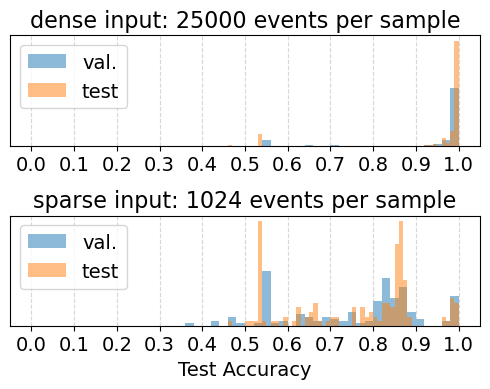

In [79]:
num_events_paper = [np.max(num_events), np.min(num_events)]

input_case = [ "dense", "sparse"]
# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(5,4))

for i, num_event in enumerate(num_events_paper):
    # ax[i].hist([[vm for vm in val_mean[num_event] if vm is not None], 
    #           [tm for tm in test_mean[num_event] if tm is not None]], 
    #          bins=50, range=(0, 1), label=['val', 'test'])
    ax[i].hist([vm for vm in val_mean[num_event] if vm is not None],  bins=50, alpha=0.5, label='val.', range=(0,1) ,edgecolor='none', density=True )
    ax[i].hist([tm for tm in test_mean[num_event] if tm is not None], bins=100, alpha=0.5, label='test', range=(0,1) ,edgecolor='none', density=True )
    ax[i].set_title(f'{input_case[i]} input: {num_event} events per sample', fontsize=16)
    ax[i].set_yticks([]) 
    ax[i].grid(axis='x', linestyle='--', alpha=0.5)  # Add pale and dashed grid lines along the x-axis
    # ax[i].set_ylabel('Frequency')
    ax[i].set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])  # Remove x-axis ticks
    ax[i].tick_params(axis='both', labelsize=14)  # Set tick label font size      
    ax[i].legend(fontsize=14)

ax[i].set_xlabel('Test Accuracy', fontsize=14)

plt.tight_layout()
if not os.path.exists(save_folder_paper):
    os.makedirs(save_folder_paper)
plt.savefig(os.path.join(save_folder_paper, f'both_events_per_sample.svg'), format = 'svg', dpi=300)  

# Adjust the spacing between subplots
# Show the figure
plt.show()
    


In [80]:
save_folder_paper

'images/paper/clustering_metric/FAN1VS3'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


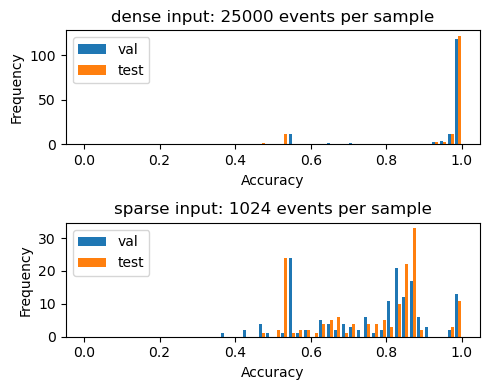

In [81]:
num_events_paper = [np.max(num_events), np.min(num_events)]

input_case = [ "dense", "sparse"]
# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(5,4))

for i, num_event in enumerate(num_events_paper):
    ax[i].hist([[vm for vm in val_mean[num_event] if vm is not None], 
              [tm for tm in test_mean[num_event] if tm is not None]], 
             bins=50, range=(0, 1), label=['val', 'test'])
    ax[i].set_title(f'{input_case[i]} input: {num_event} events per sample')
    ax[i].set_xlabel('Accuracy')
    ax[i].set_ylabel('Frequency')
    ax[i].legend()


plt.tight_layout()
if not os.path.exists(save_folder_paper):
    os.makedirs(save_folder_paper)
plt.savefig(os.path.join(save_folder_paper, f'both_events_per_sample.eps'), format='eps')    

# Adjust the spacing between subplots
# Show the figure
plt.show()
    

    

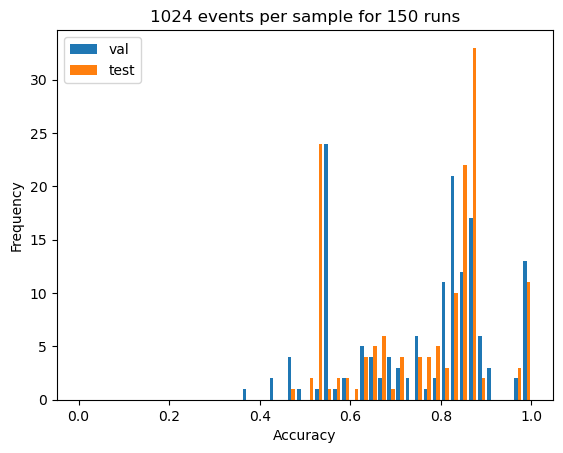

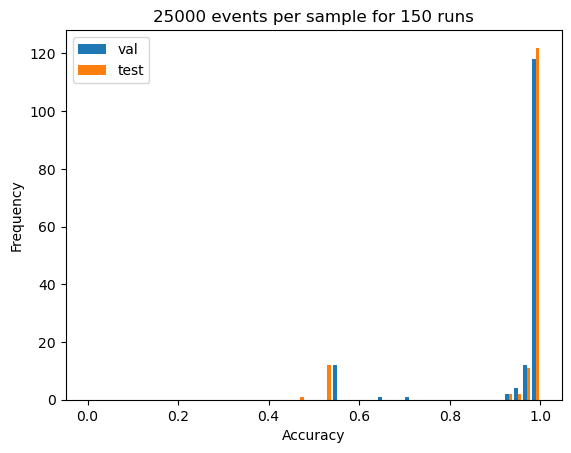

In [82]:
for num_event in num_events:
    
    plt.hist([[vm for vm in val_mean[num_event] if vm is not None], 
              [tm for tm in test_mean[num_event] if tm is not None]], 
             bins=50, range=(0., 1), label=['val', 'test'])
    plt.title(f'{num_event} events per sample for {len(val_mean[num_event])} runs')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend()
    
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    plt.savefig(os.path.join(save_folder, f'{num_event}_events_per_sample.png'))    
    plt.show()
    


In [83]:
def comopute_cluster_dis(data, K=5):

    data = np.array(data)

    # Reshape data for KMeans clustering
    X = data.reshape(-1, 1)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=K,  random_state=42,n_init='auto')
    kmeans.fit(X)

    # Assign each data point to a cluster
    labels = kmeans.labels_
    centers = np.squeeze(kmeans.cluster_centers_)

    # Find the cluster with the maximum value
    max_cluster_center = np.max(centers)

    # Find the cluster with the most samples
    unique_labels, counts = np.unique(labels, return_counts=True)
    most_samples_cluster_index = np.argmax(counts)
    most_samples_cluster_center = centers[unique_labels[most_samples_cluster_index]]

    # Compute the difference between the centers
    center_difference = abs(max_cluster_center - most_samples_cluster_center)

    return center_difference





Validation accuracy
Number of events: 1024
Center difference for 1024 events and K=2: 0.0
Center difference for 1024 events and K=3: 0.0
Center difference for 1024 events and K=4: 0.14360548241497706
Center difference for 1024 events and K=5: 0.14166760847602078
Center difference for 1024 events and K=6: 0.16455384584573596
Center difference for 1024 events and K=7: 0.4709882257615817
Center difference for 1024 events and K=8: 0.44611427060195363
Center difference for 1024 events and K=9: 0.45128887472329304
maximum center difference for 1024 events: 0.4709882257615817
Number of events: 25000
Center difference for 25000 events and K=2: 0.0
Center difference for 25000 events and K=3: 0.0
Center difference for 25000 events and K=4: 0.0
Center difference for 25000 events and K=5: 0.0
Center difference for 25000 events and K=6: 0.0
Center difference for 25000 events and K=7: 0.0
Center difference for 25000 events and K=8: 0.0
Center difference for 25000 events and K=9: 0.0
maximum center d

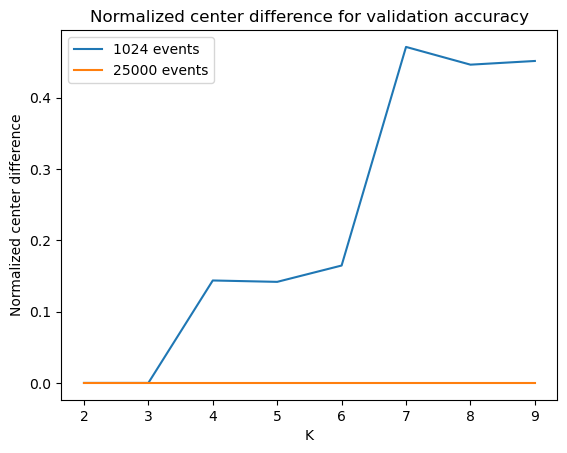

Test accuracy
Number of events: 1024
Center difference for 1024 events and K=2: 0.0
Center difference for 1024 events and K=3: 0.1445271792761225
Center difference for 1024 events and K=4: 0.14301607917020306
Center difference for 1024 events and K=5: 0.12894617258818575
Center difference for 1024 events and K=6: 0.1282823336579301
Center difference for 1024 events and K=7: 0.1282823336579301
Center difference for 1024 events and K=8: 0.11870978547214275
Center difference for 1024 events and K=9: 0.11870978547214275
maximum center difference for 1024 events: 0.1445271792761225
Number of events: 25000
Center difference for 25000 events and K=2: 0.0
Center difference for 25000 events and K=3: 0.0
Center difference for 25000 events and K=4: 0.0
Center difference for 25000 events and K=5: 0.0
Center difference for 25000 events and K=6: 0.0
Center difference for 25000 events and K=7: 0.0
Center difference for 25000 events and K=8: 0.0
Center difference for 25000 events and K=9: 0.0
maximum 

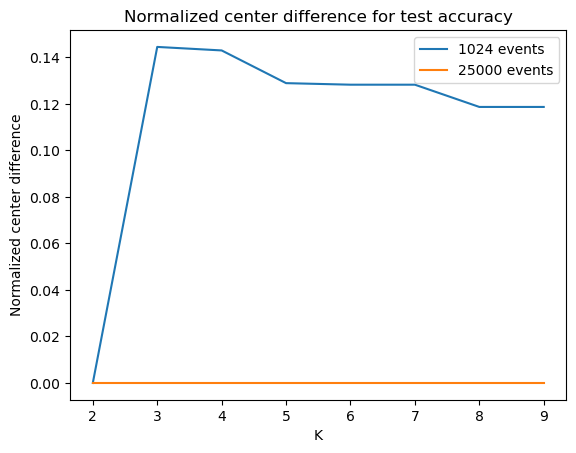

In [84]:
metric_val = {}
metric_test = {}
K = 10
print('Validation accuracy')
for num_event in num_events:
    print(f'Number of events: {num_event}')
    data = np.array([vm for vm in val_mean[num_event] if vm is not None])
    center_difference = []
    for k in range(2, K):
        
        center_difference.append(comopute_cluster_dis(data, k)/np.max(data))
        print(f'Center difference for {num_event} events and K={k}: {center_difference[-1]}')
    print(f'maximum center difference for {num_event} events: {np.max(center_difference)}')
    plt.plot(range(2, K), center_difference, label=f'{num_event} events')
    metric_val[num_event] = (center_difference, np.max(data), np.mean(data))
plt.title('Normalized center difference for validation accuracy')
plt.xlabel('K')
plt.ylabel('Normalized center difference')
plt.legend()
plt.savefig(os.path.join(save_folder, 'center_difference_val.png'))
plt.show()

print('Test accuracy')
for num_event in num_events:
    print(f'Number of events: {num_event}')
    data = np.array([tm for tm in test_mean[num_event] if tm is not None])
    center_difference = []
    for k in range(2, K):
        
        center_difference.append(comopute_cluster_dis(data, k)/np.max(data))
        print(f'Center difference for {num_event} events and K={k}: {center_difference[-1]}')
    print(f'maximum center difference for {num_event} events: {np.max(center_difference)}')
    plt.plot(range(2, K), center_difference, label=f'{num_event} events')
    metric_test[num_event] = (center_difference, np.max(data), np.mean(data))
plt.title('Normalized center difference for test accuracy')
plt.xlabel('K')
plt.ylabel('Normalized center difference')
plt.legend()
plt.savefig(os.path.join(save_folder, 'center_difference_test.png'))
plt.show()
clustering_metric = {'val': metric_val, 'test': metric_test}

In [85]:
import pickle
with open(os.path.join(save_folder_paper,"clustering_metric.pkl"), "wb") as f:
    pickle.dump(clustering_metric, f)

Mode acc.: 0.8365384608507156
Mean acc.: 0.7661965948343277
Maximum acc.: 0.9961538314819336
Distance between max and mode: 0.159615370631218
Normalized distance: 0.1602316485534823
Cluster-based normalized distance: 0.11870978547214275


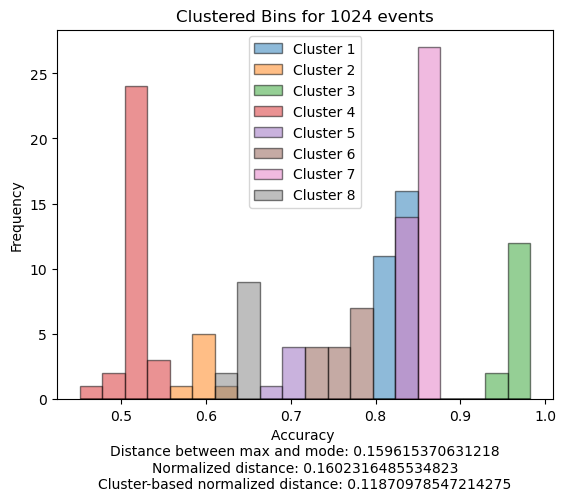

Mode acc.: 0.9730769231915474
Mean acc.: 0.9514401811361313
Maximum acc.: 1.0
Distance between max and mode: 0.02692307680845263
Normalized distance: 0.02692307680845263
Cluster-based normalized distance: 0.0


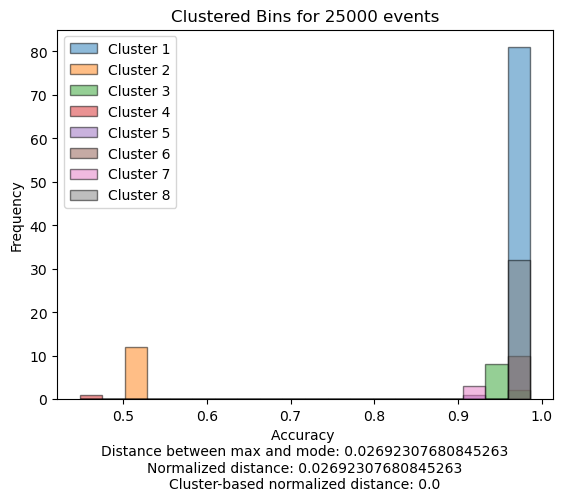

In [86]:
K = 8
for num_event in num_events:

    data = np.array([vm for vm in test_mean[num_event] if vm is not None])

    # Compute histogram
    hist, bins = np.histogram(data, bins=20)   
    
    # Find mode (bin with highest frequency)
    mode_value = bins[np.argmax(hist)]

    # Find maximum value in data
    max_value = np.max(data)
    mean_value = np.mean(data) 
    # Compute distance between max value and mode 
    print("Mode acc.:", mode_value)
    print("Mean acc.:", mean_value)
    print("Maximum acc.:", max_value)
    distance = abs(max_value - mode_value)
    print("Distance between max and mode:", distance)
    normalized_distance = distance / max_value
    print("Normalized distance:", normalized_distance)
    print("Cluster-based normalized distance:", comopute_cluster_dis(data, K)/max_value)
    

    # Reshape data for KMeans clustering
    X = data.reshape(-1, 1)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=K, random_state=42,n_init='auto')
    kmeans.fit(X)
    labels = kmeans.labels_

    # Plot histogram with clusters
    for i in range(K):
        cluster_data = data[labels == i]
        hist, _ = np.histogram(cluster_data, bins=bins)
        plt.bar(bins[:-1], hist, width=np.diff(bins), edgecolor='black', alpha=0.5, label=f'Cluster {i+1}')

    plt.xlabel(f'Accuracy \nDistance between max and mode: {distance}\nNormalized distance: {normalized_distance}\nCluster-based normalized distance: {comopute_cluster_dis(data, K)/max_value}')
    plt.ylabel('Frequency')
    plt.title(f'Clustered Bins for {num_event} events')
    plt.legend()
    plt.savefig(os.path.join(save_folder, f'clustered_bins_{num_event}.png'), bbox_inches='tight')
    plt.show()
